In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
df=pd.read_csv('AEP_hourly.csv')

In [3]:
df=df.set_index('Datetime')

In [4]:
df.index=pd.to_datetime(df.index)

In [5]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


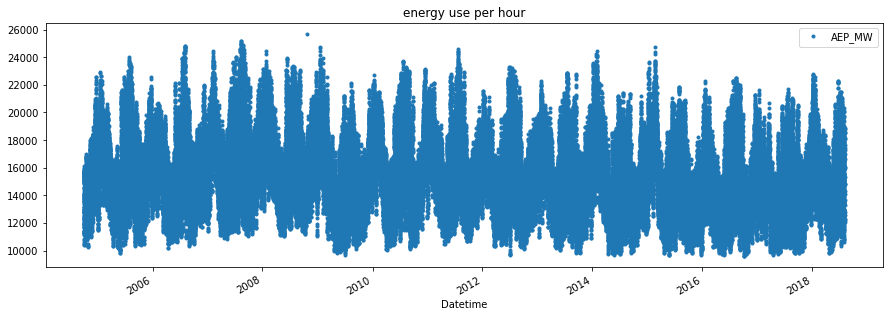

In [6]:
color_pal=sns.color_palette()

df.plot(figsize=(15,5),
        style='.',
        color=color_pal[0],
        title='energy use per hour')
plt.show()

In [7]:
train=df.query('index<"2015-01-01"')
test=df.query('index>="2015-01-01"')

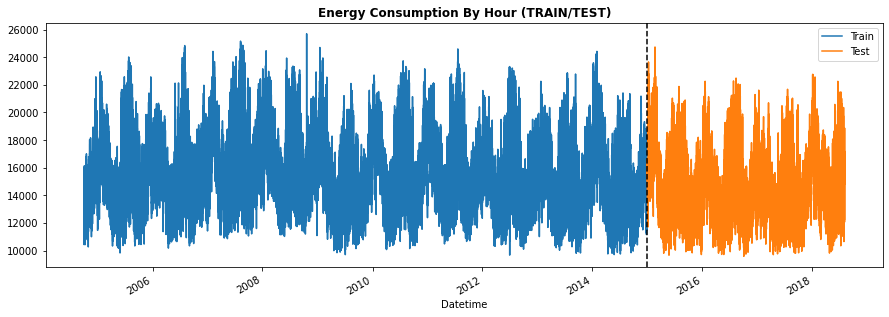

In [8]:
#plt.figure(figsize=(15,5))
#plt.plot(train.index,train['AEP_MW'],label='train')
#plt.plot(test.index,test['AEP_MW'],label='test')
#plt.legend()
#plt.show()

fig,ax=plt.subplots(1,1,figsize=(15,5))
train.plot(ax=ax)
test.plot(ax=ax)
plt.axvline('2015-01-01',ls='--',color='k')
ax.legend(['Train','Test'])
ax.set_title('Energy Consumption By Hour (TRAIN/TEST)',fontweight='bold')
plt.show()

In [9]:
df['year']=df.index.year
df['quarter']=df.index.quarter
df['month']=df.index.month
df['dayofweek']=df.index.dayofweek
df['day']=df.index.day
df['hour']=df.index.hour

In [10]:
train=df.query('index<"2015-01-01"')
test=df.query('index>="2015-01-01"')

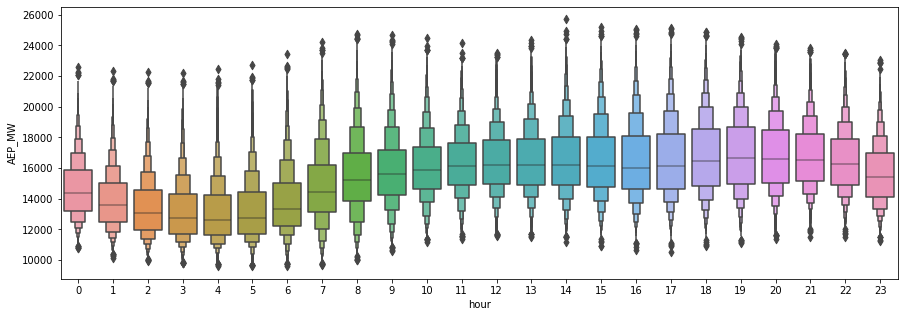

In [11]:
plt.figure(figsize=(15,5))
sns.boxenplot(data=df,x='hour',y='AEP_MW')
plt.show()

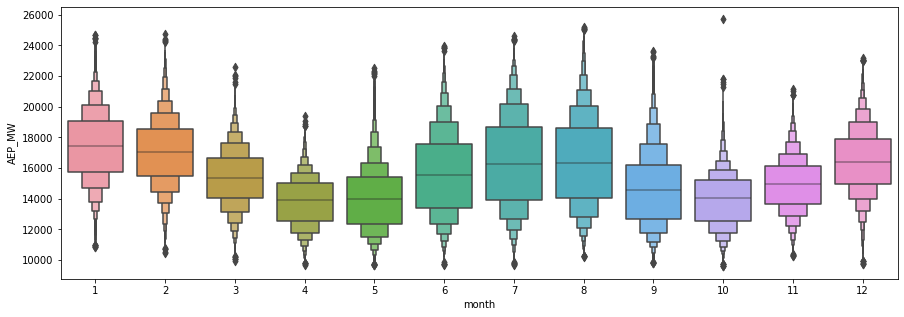

In [12]:
plt.figure(figsize=(15,5))
sns.boxenplot(data=df,x='month',y='AEP_MW')
plt.show()

In [13]:
FEATURES = ['day', 'hour', 'dayofweek', 'quarter', 'month', 'year']
TARGET = 'AEP_MW'

xtrain = train[FEATURES]
ytrain = train[TARGET]

xtest = test[FEATURES]
ytest = test[TARGET]

In [14]:
model=XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)

In [15]:
model.fit(xtrain,ytrain,
         eval_set=[(xtrain,ytrain),(xtest,ytest)],
         verbose=True)

[0]	validation_0-rmse:15792.57413	validation_1-rmse:14861.68953
[1]	validation_0-rmse:15636.33440	validation_1-rmse:14706.10904
[2]	validation_0-rmse:15481.67236	validation_1-rmse:14552.31020
[3]	validation_0-rmse:15328.56535	validation_1-rmse:14399.88320
[4]	validation_0-rmse:15177.01111	validation_1-rmse:14248.94812
[5]	validation_0-rmse:15026.98827	validation_1-rmse:14099.58203
[6]	validation_0-rmse:14878.48508	validation_1-rmse:13951.27901
[7]	validation_0-rmse:14731.47900	validation_1-rmse:13804.93410
[8]	validation_0-rmse:14585.95309	validation_1-rmse:13659.71547
[9]	validation_0-rmse:14441.90560	validation_1-rmse:13515.46016
[10]	validation_0-rmse:14299.31242	validation_1-rmse:13373.50009
[11]	validation_0-rmse:14158.16562	validation_1-rmse:13232.87131
[12]	validation_0-rmse:14018.44295	validation_1-rmse:13093.78767
[13]	validation_0-rmse:13880.13760	validation_1-rmse:12955.74913
[14]	validation_0-rmse:13743.21607	validation_1-rmse:12818.76696
[15]	validation_0-rmse:13607.65961	

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=50, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [16]:
model.feature_importances_

array([0.02679183, 0.40563935, 0.19238105, 0.1271451 , 0.19416775,
       0.05387496], dtype=float32)

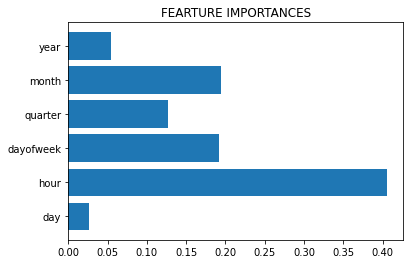

In [18]:
plt.barh(FEATURES,model.feature_importances_)
plt.title('FEARTURE IMPORTANCES')
plt.show()

In [19]:
test['predictions']=model.predict(xtest)

C:\Users\berid\AppData\Local\Temp\ipykernel_2752\3565056712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=model.predict(xtest)


In [20]:
test

,AEP_MW,year,quarter,month,dayofweek,day,hour,predictions
Datetime,,,,,,,,
2015-01-01 00:00:00,16375.0,2015,1,1,3,1,0,15888.452148
2015-12-31 01:00:00,12415.0,2015,4,12,3,31,1,14287.210938
2015-12-31 02:00:00,12087.0,2015,4,12,3,31,2,14075.488281
2015-12-31 03:00:00,12010.0,2015,4,12,3,31,3,14042.041992
2015-12-31 04:00:00,11972.0,2015,4,12,3,31,4,14042.041992
...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,2018,1,1,0,1,20,16846.669922
2018-01-01 21:00:00,20999.0,2018,1,1,0,1,21,16846.669922
2018-01-01 22:00:00,20820.0,2018,1,1,0,1,22,16726.458984


In [21]:
merged=df.merge(test['predictions'],how='left',left_index=True,right_index=True)

In [22]:
merged

,AEP_MW,year,quarter,month,dayofweek,day,hour,predictions
Datetime,,,,,,,,
2004-10-01 01:00:00,12379.0,2004,4,10,4,1,1,NaN
2004-10-01 02:00:00,11935.0,2004,4,10,4,1,2,NaN
2004-10-01 03:00:00,11692.0,2004,4,10,4,1,3,NaN
2004-10-01 04:00:00,11597.0,2004,4,10,4,1,4,NaN
2004-10-01 05:00:00,11681.0,2004,4,10,4,1,5,NaN
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,2018,3,8,3,2,20,17332.552734
2018-08-02 21:00:00,17303.0,2018,3,8,3,2,21,17151.816406
2018-08-02 22:00:00,17001.0,2018,3,8,3,2,22,17121.562500


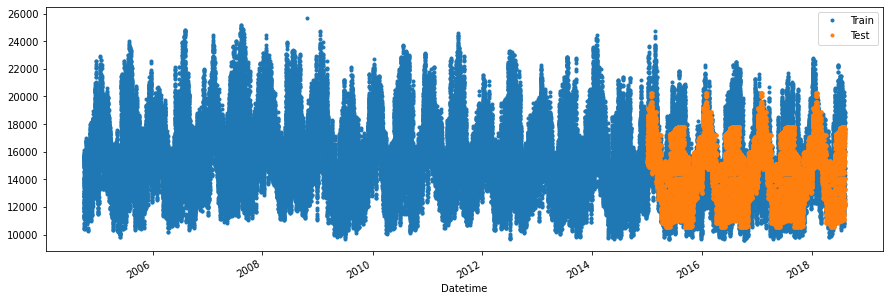

In [23]:
#fig,ax=plt.subplots(figsize=(15,5))
#merged['AEP_MW'].plot(ax=ax,style='.')
#merged['predictions'].plot(ax=ax,style='.',color=color_pal[1])
ax=merged['AEP_MW'].plot(style='.',figsize=(15,5),label='Train')
merged['predictions'].plot(style='.',color=color_pal[1],label='Test')
plt.legend()
plt.show()

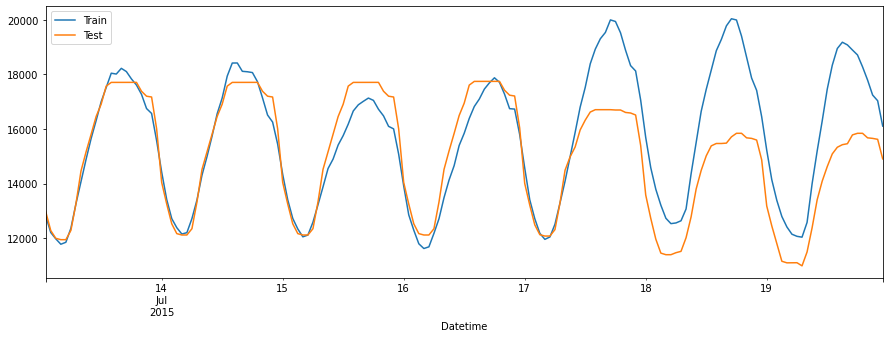

In [24]:
week=merged.query('index>"2015-07-13" and index<"2015-07-20"')
fig,ax=plt.subplots(figsize=(15,5))
week['AEP_MW'].plot(ax=ax,style='-',label='Train')
week['predictions'].plot(ax=ax,style='-',color=color_pal[1],label='Test')
plt.legend()
plt.show()

In [25]:
rmse=metrics.mean_squared_error(test['AEP_MW'],test['predictions'],squared=False)
mae=metrics.mean_absolute_error(test['AEP_MW'],test['predictions'])
print(rmse,mae)

1602.7446184981427 1230.4831502278646


In [26]:
test['error']=np.abs(test['AEP_MW']-test['predictions'])
test['date']=test.index.date
test.groupby('date')['error'].mean().reset_index().sort_values('error')

C:\Users\berid\AppData\Local\Temp\ipykernel_2752\3128978184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error']=np.abs(test['AEP_MW']-test['predictions'])
C:\Users\berid\AppData\Local\Temp\ipykernel_2752\3128978184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['date']=test.index.date


,date,error
193,2015-07-13,212.970296
1031,2017-10-28,216.556966
702,2016-12-03,221.132406
192,2015-07-12,236.919922
701,2016-12-02,239.956746
...,...,...
45,2015-02-15,4293.569824
1102,2018-01-07,4337.952555
1101,2018-01-06,4866.058228
49,2015-02-19,5153.087240
